In [124]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [67]:
df = pd.read_csv("loan_data_v3.csv")

In [68]:
df.head()

,Unnamed: 0,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,4847,26.0,male,Associate,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0
1,13802,22.0,female,Bachelor,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0
2,39763,25.0,female,High School,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0
3,39215,31.0,female,Master,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0
4,26369,33.0,female,Associate,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0


In [69]:
df.columns

Index(['Unnamed: 0', 'person_age', 'person_gender', 'person_education',
       'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt',
       'loan_intent', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [70]:
len(df) == len(df["Unnamed: 0"].unique())

True

In [71]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [72]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,26.0,male,Associate,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0
1,22.0,female,Bachelor,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0
2,25.0,female,High School,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0
3,31.0,female,Master,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0
4,33.0,female,Associate,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0


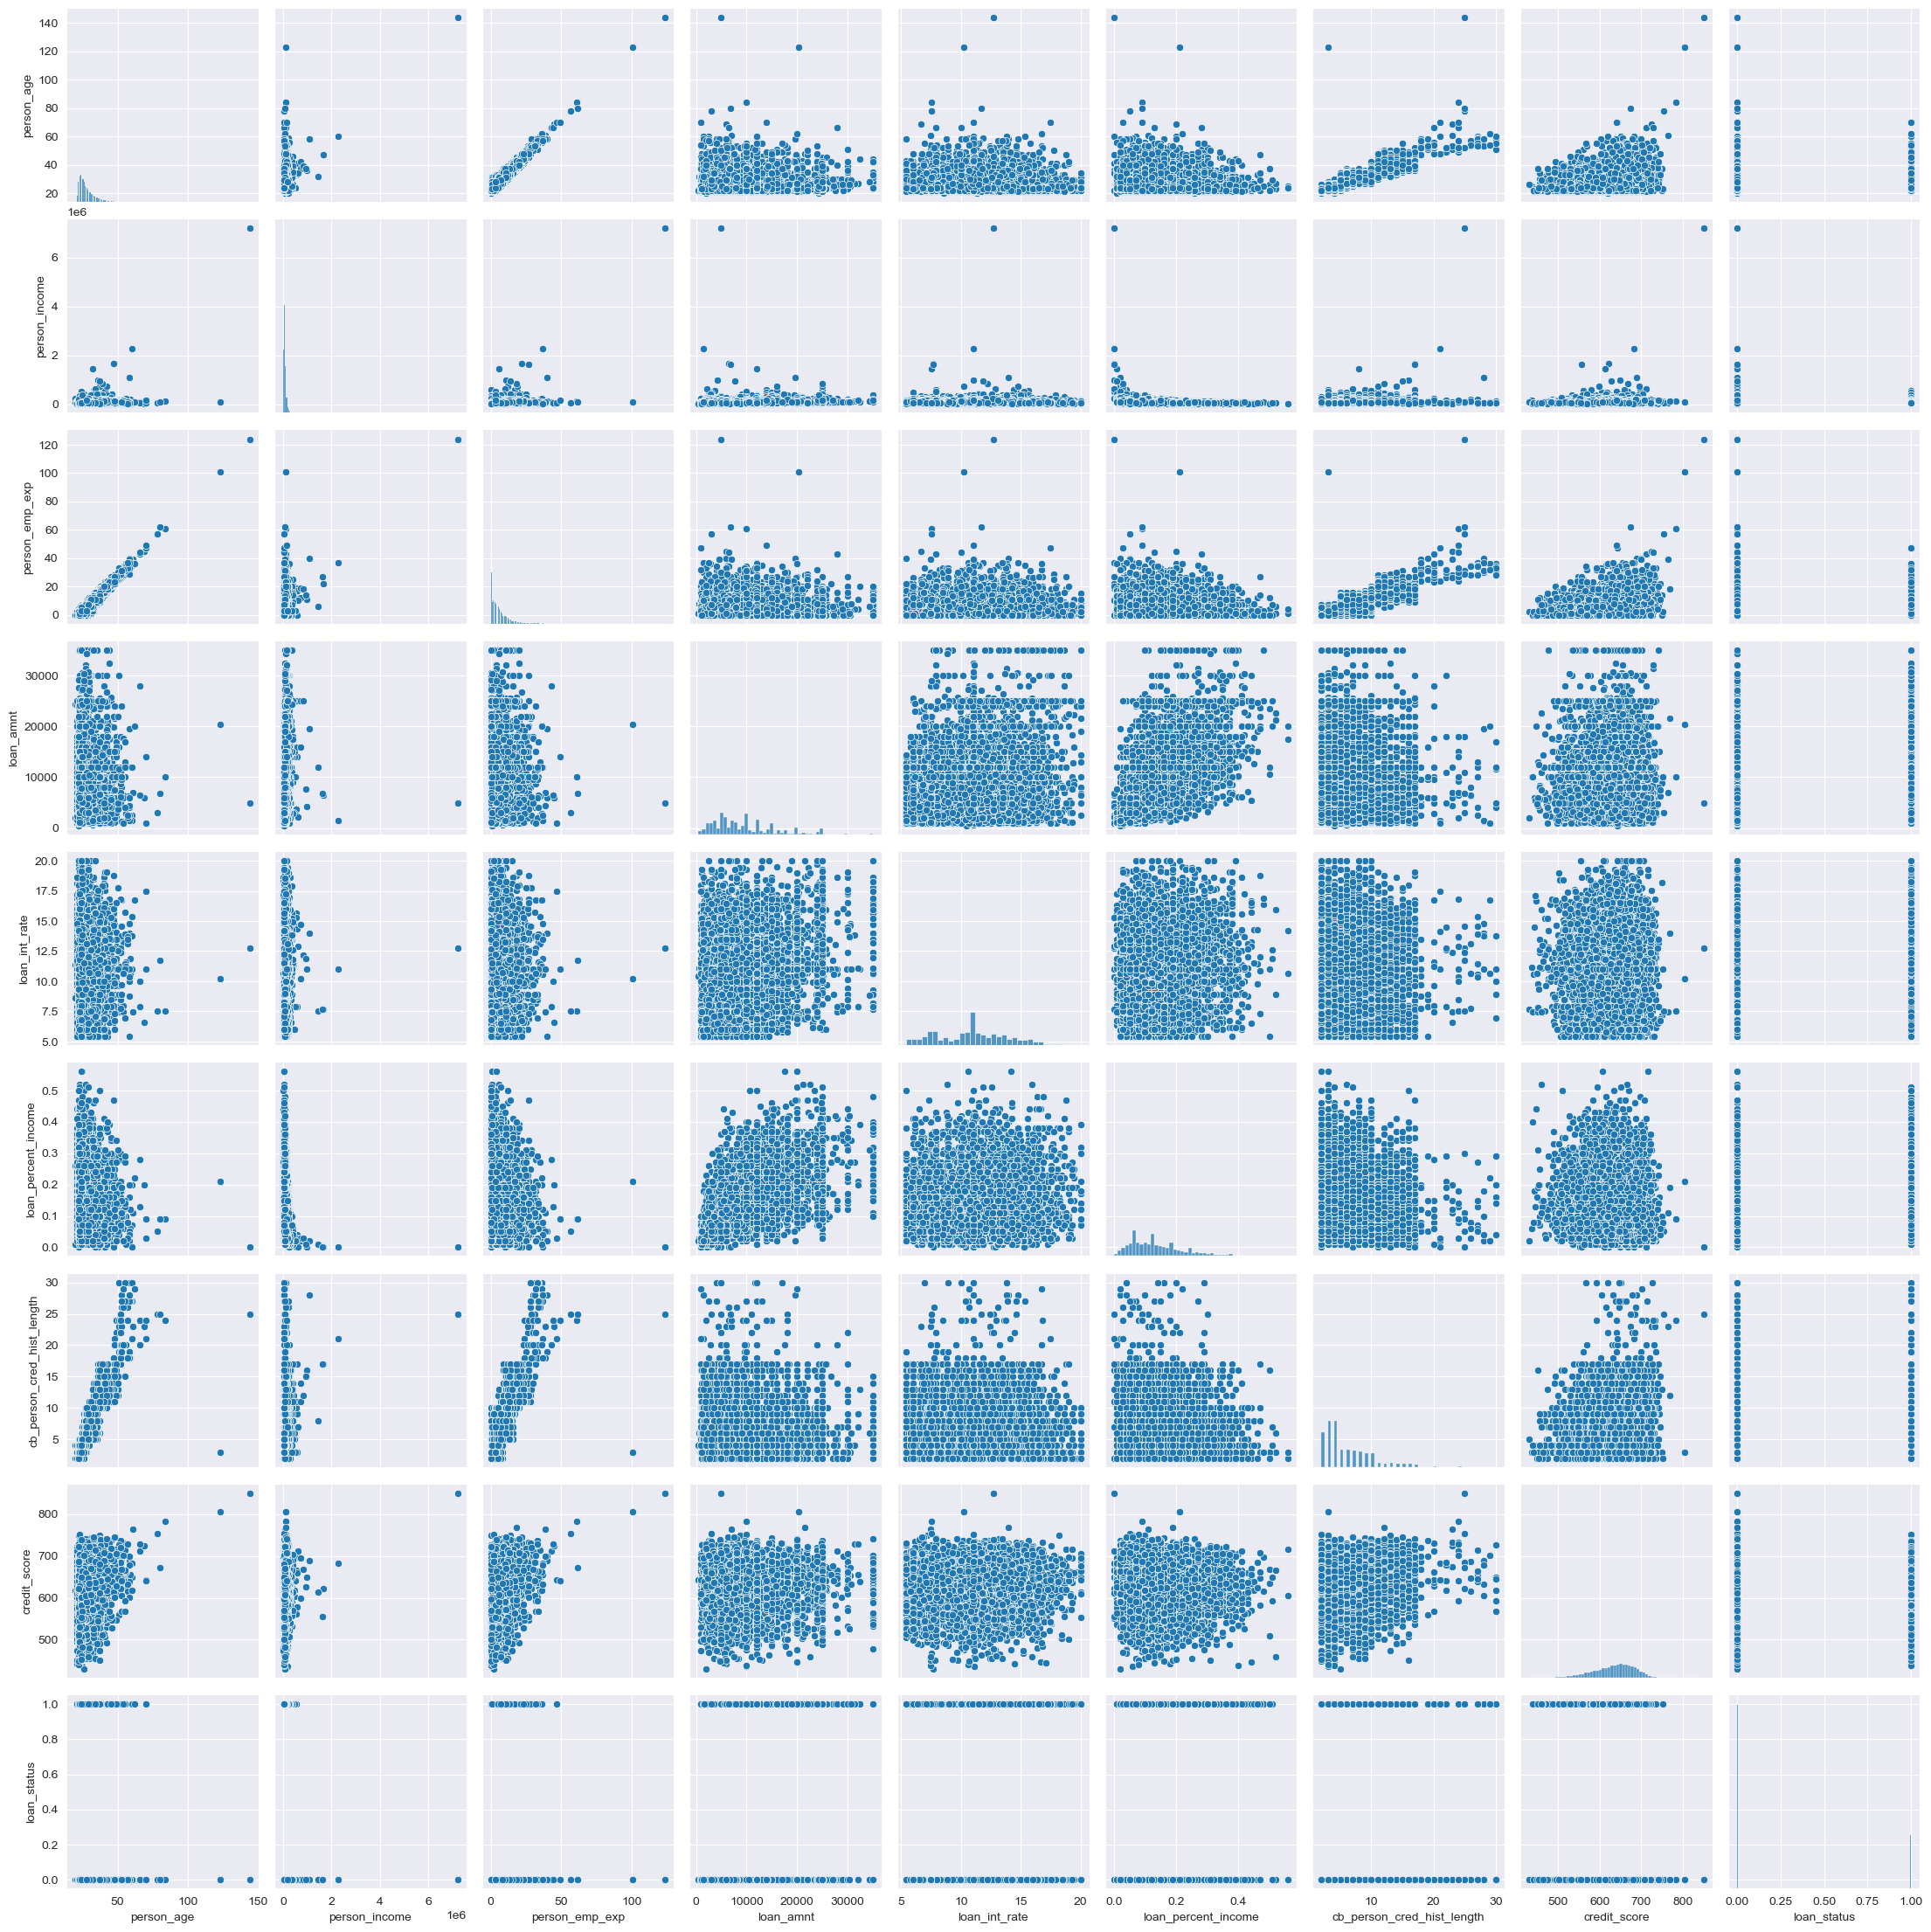

In [73]:
sns.pairplot(df)

<Axes: >

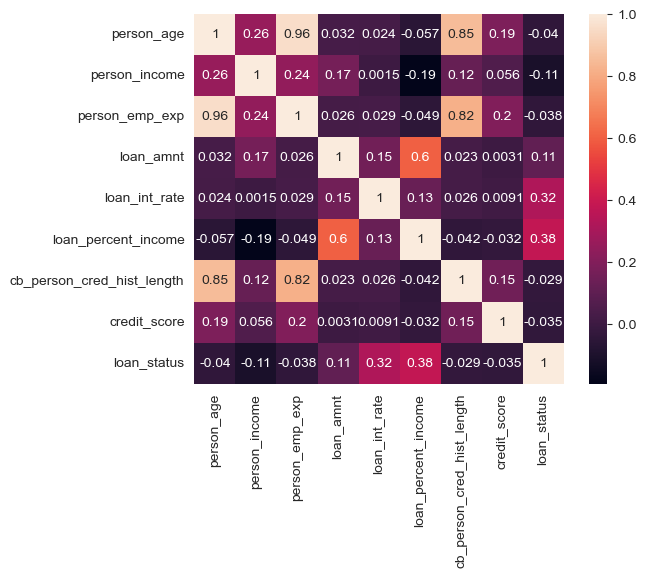

In [74]:
sns.heatmap(df.corr(numeric_only=True), annot=True, square=True)

<Axes: xlabel='loan_status'>

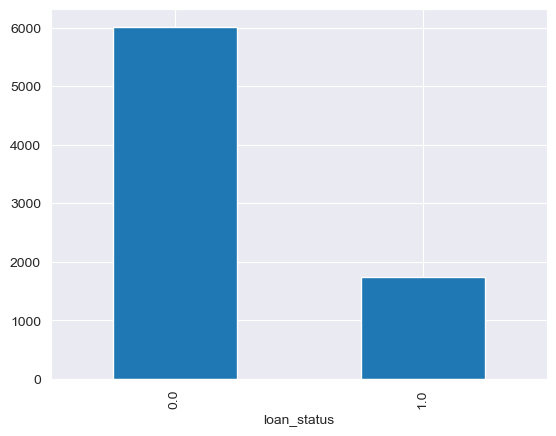

In [75]:
df["loan_status"].value_counts().plot.bar()

In [76]:
df.isnull().sum()

person_age                        488
person_gender                     294
person_education                  422
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                         336
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      522
previous_loan_defaults_on_file      0
loan_status                       250
dtype: int64

<Axes: >

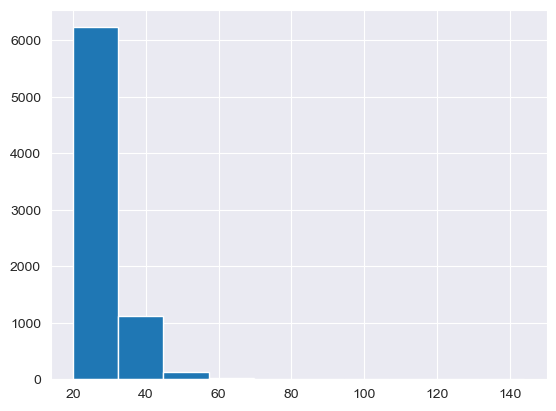

In [77]:
df["person_age"].hist()

In [78]:
df["person_age"] = df["person_age"].fillna(df["person_age"]).mean()

<Axes: xlabel='person_gender'>

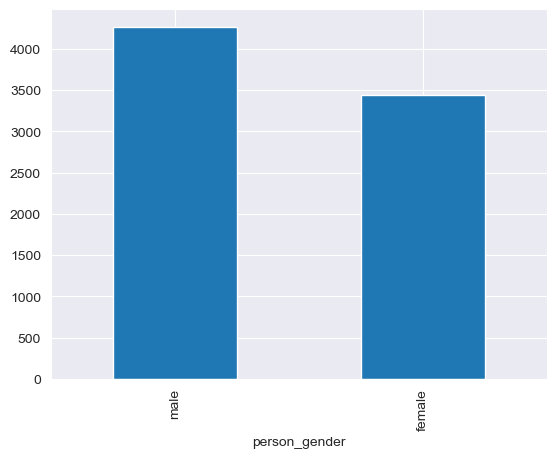

In [79]:
df["person_gender"].value_counts().plot.bar()

In [80]:
df["person_gender"] = df["person_gender"].map({"male": 0, "female": 1})

<Axes: xlabel='person_education'>

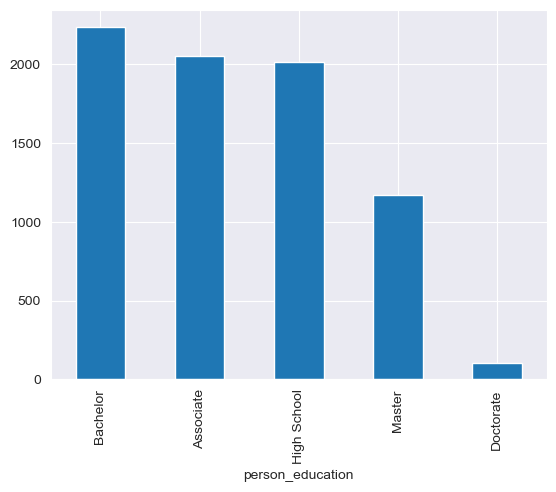

In [81]:
df['person_education'].value_counts().plot.bar()

In [82]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,27.854633,0.0,Associate,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0
1,27.854633,1.0,Bachelor,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0
2,27.854633,1.0,High School,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0
3,27.854633,1.0,Master,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0
4,27.854633,1.0,Associate,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0


In [83]:
df.isnull().sum()

person_age                          0
person_gender                     294
person_education                  422
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                         336
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      522
previous_loan_defaults_on_file      0
loan_status                       250
dtype: int64

In [84]:
education_order = ["High School", "Associate", "Bachelor", "Master", "Doctorate"]
encoder = OrdinalEncoder(categories=[education_order], handle_unknown="use_encoded_value", unknown_value=np.nan)
df[["person_education"]] = encoder.fit_transform(df[["person_education"]])

In [85]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,27.854633,0.0,1.0,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0
1,27.854633,1.0,2.0,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0
2,27.854633,1.0,0.0,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0
3,27.854633,1.0,3.0,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0
4,27.854633,1.0,1.0,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0


In [86]:
df.isnull().sum()

person_age                          0
person_gender                     294
person_education                  422
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                         336
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      522
previous_loan_defaults_on_file      0
loan_status                       250
dtype: int64

<Axes: >

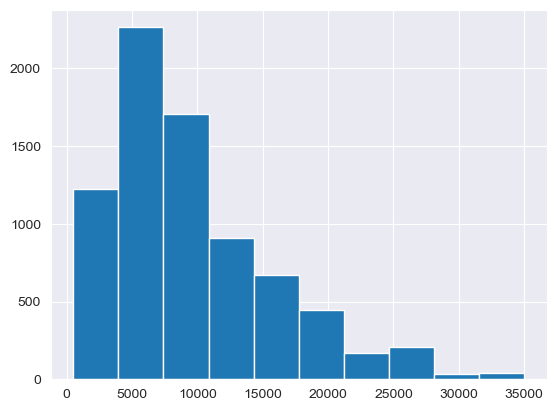

In [87]:
df['loan_amnt'].hist()

In [88]:
df['loan_amnt'] = df['loan_amnt'].fillna(df['person_age'].median())

<Axes: >

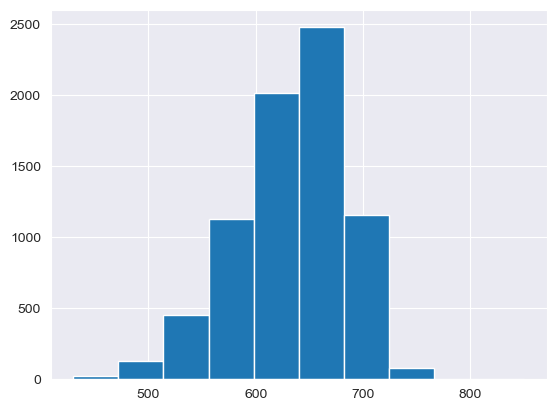

In [89]:
df['credit_score'].hist()

In [90]:
df['credit_score'] = df['credit_score'].fillna(df['credit_score'].mean())

In [91]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,27.854633,0.0,1.0,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0
1,27.854633,1.0,2.0,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0
2,27.854633,1.0,0.0,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0
3,27.854633,1.0,3.0,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0
4,27.854633,1.0,1.0,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0


In [92]:
df.isnull().sum()

person_age                          0
person_gender                     294
person_education                  422
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                           0
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                        0
previous_loan_defaults_on_file      0
loan_status                       250
dtype: int64

In [93]:
df['person_home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [94]:
df = pd.concat([df, pd.get_dummies(df["person_home_ownership"])], axis=1)

In [95]:
loan_intents = pd.get_dummies(df['loan_intent'], prefix='loan_intent')
df = pd.concat([df, loan_intents], axis=1)
df.drop(columns=['loan_intent'], inplace=True)

In [96]:
df.drop(columns=["person_home_ownership"], inplace=True)

In [97]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,MORTGAGE,OTHER,OWN,RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,27.854633,0.0,1.0,43996.0,4,5000.0,10.37,0.11,4.0,675.0,...,False,False,False,True,False,False,False,False,False,True
1,27.854633,1.0,2.0,115708.0,0,20000.0,7.88,0.17,3.0,635.0,...,True,False,False,False,False,True,False,False,False,False
2,27.854633,1.0,0.0,57827.0,0,6000.0,11.60,0.10,4.0,589.0,...,False,False,False,True,False,False,False,False,True,False
3,27.854633,1.0,3.0,126727.0,9,24000.0,10.27,0.19,7.0,644.0,...,False,False,False,True,True,False,False,False,False,False
4,27.854633,1.0,1.0,120987.0,10,25000.0,12.18,0.21,10.0,644.0,...,False,False,True,False,False,False,False,True,False,False


In [98]:
df['previous_loan_defaults_on_file'].unique()

array(['No', 'Yes'], dtype=object)

In [99]:
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'No': 0, 'Yes': 1})

In [100]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,MORTGAGE,OTHER,OWN,RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,27.854633,0.0,1.0,43996.0,4,5000.0,10.37,0.11,4.0,675.0,...,False,False,False,True,False,False,False,False,False,True
1,27.854633,1.0,2.0,115708.0,0,20000.0,7.88,0.17,3.0,635.0,...,True,False,False,False,False,True,False,False,False,False
2,27.854633,1.0,0.0,57827.0,0,6000.0,11.60,0.10,4.0,589.0,...,False,False,False,True,False,False,False,False,True,False
3,27.854633,1.0,3.0,126727.0,9,24000.0,10.27,0.19,7.0,644.0,...,False,False,False,True,True,False,False,False,False,False
4,27.854633,1.0,1.0,120987.0,10,25000.0,12.18,0.21,10.0,644.0,...,False,False,True,False,False,False,False,True,False,False


In [101]:
df.isnull().sum()

person_age                          0
person_gender                     294
person_education                  422
person_income                       0
person_emp_exp                      0
loan_amnt                           0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                        0
previous_loan_defaults_on_file      0
loan_status                       250
MORTGAGE                            0
OTHER                               0
OWN                                 0
RENT                                0
loan_intent_DEBTCONSOLIDATION       0
loan_intent_EDUCATION               0
loan_intent_HOMEIMPROVEMENT         0
loan_intent_MEDICAL                 0
loan_intent_PERSONAL                0
loan_intent_VENTURE                 0
dtype: int64

In [102]:
df.sample(25)

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,MORTGAGE,OTHER,OWN,RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1537,27.854633,0.0,0.0,18192.0,14,7000.000000,5.42,0.38,16.0,694.000000,...,False,False,True,False,True,False,False,False,False,False
6113,27.854633,1.0,1.0,169093.0,1,16400.000000,15.96,0.10,3.0,719.000000,...,False,False,True,False,False,True,False,False,False,False
72,27.854633,1.0,NaN,73106.0,9,3600.000000,9.63,0.05,5.0,683.000000,...,False,False,False,True,False,True,False,False,False,False
4598,27.854633,0.0,1.0,34540.0,0,6000.000000,9.63,0.17,4.0,664.000000,...,False,False,False,True,False,False,False,False,True,False
2996,27.854633,0.0,0.0,72998.0,1,5000.000000,7.29,0.07,4.0,655.000000,...,False,False,True,False,False,False,True,False,False,False
5557,27.854633,1.0,3.0,37969.0,4,9600.000000,16.77,0.25,3.0,674.000000,...,False,False,False,True,True,False,False,False,False,False
5825,27.854633,1.0,NaN,80064.0,10,6000.000000,14.35,0.07,5.0,664.000000,...,False,False,False,True,True,False,False,False,False,False
3194,27.854633,1.0,0.0,49112.0,4,27.854633,11.01,0.15,7.0,523.000000,...,False,False,False,True,False,False,False,True,False,False
6524,27.854633,0.0,2.0,91003.0,6,4800.000000,15.27,0.05,3.0,604.000000,...,True,False,False,False,False,False,False,True,False,False
3259,27.854633,1.0,0.0,18577.0,8,27.854633,13.61,0.19,7.0,656.000000,...,False,False,False,True,False,True,False,False,False,False


<Axes: >

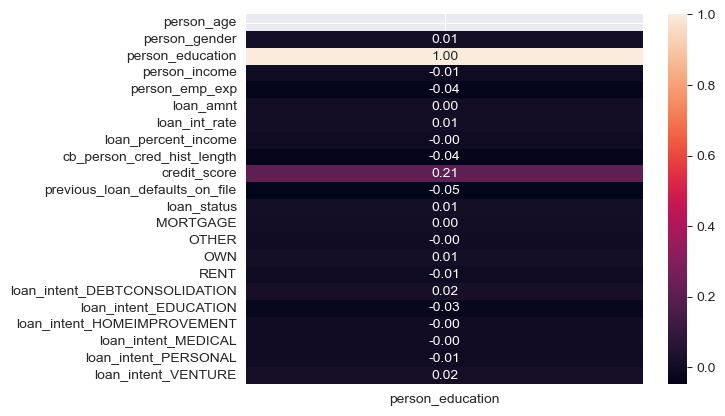

In [103]:
sns.heatmap(df.corr()[['person_education']], annot=True, fmt='.2f')

<Axes: >

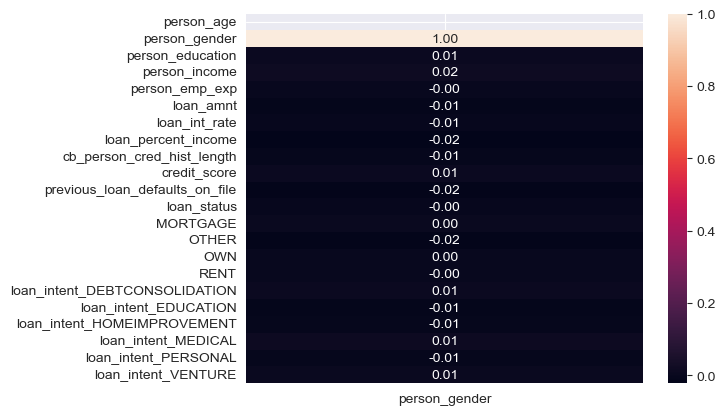

In [104]:
sns.heatmap(df.corr()[['person_gender']], annot=True, fmt='.2f')

<Axes: ylabel='Frequency'>

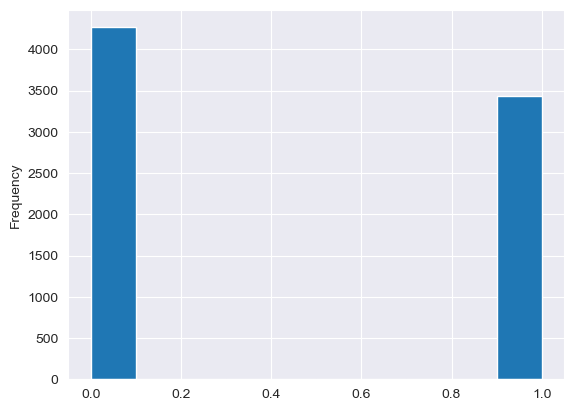

In [105]:
df["person_gender"].plot.hist()

<Axes: ylabel='Frequency'>

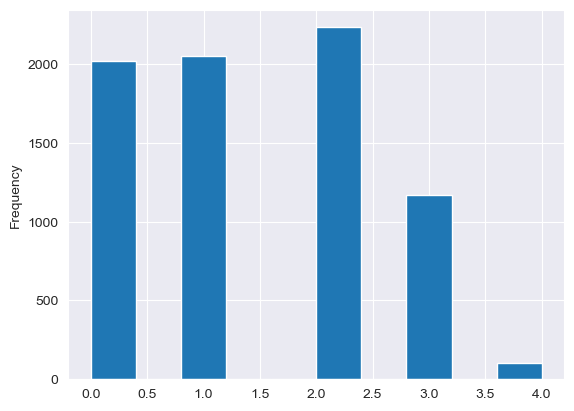

In [106]:
df["person_education"].plot.hist()

In [107]:
df.isnull().sum()

person_age                          0
person_gender                     294
person_education                  422
person_income                       0
person_emp_exp                      0
loan_amnt                           0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                        0
previous_loan_defaults_on_file      0
loan_status                       250
MORTGAGE                            0
OTHER                               0
OWN                                 0
RENT                                0
loan_intent_DEBTCONSOLIDATION       0
loan_intent_EDUCATION               0
loan_intent_HOMEIMPROVEMENT         0
loan_intent_MEDICAL                 0
loan_intent_PERSONAL                0
loan_intent_VENTURE                 0
dtype: int64

<Axes: >

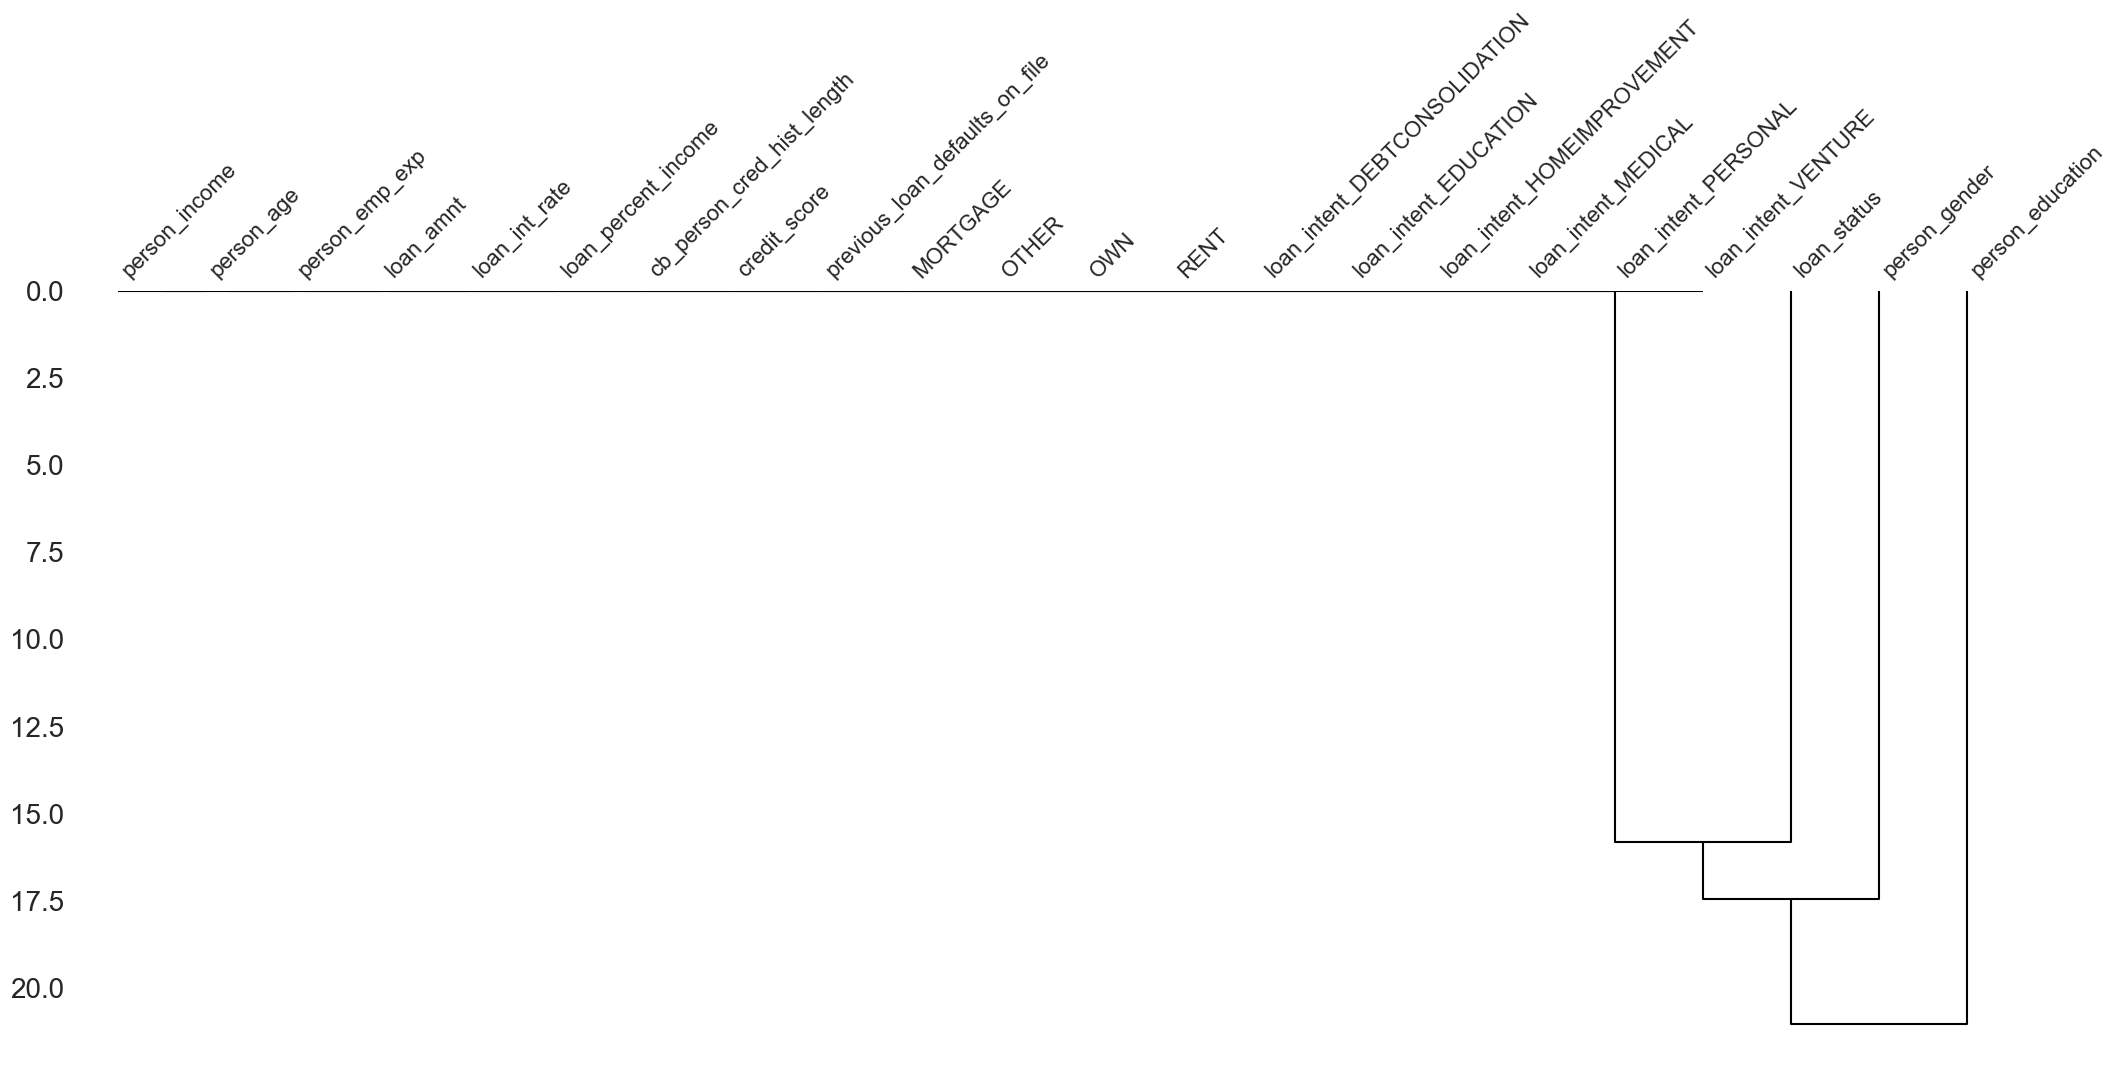

In [108]:
msno.dendrogram(df)

<Axes: >

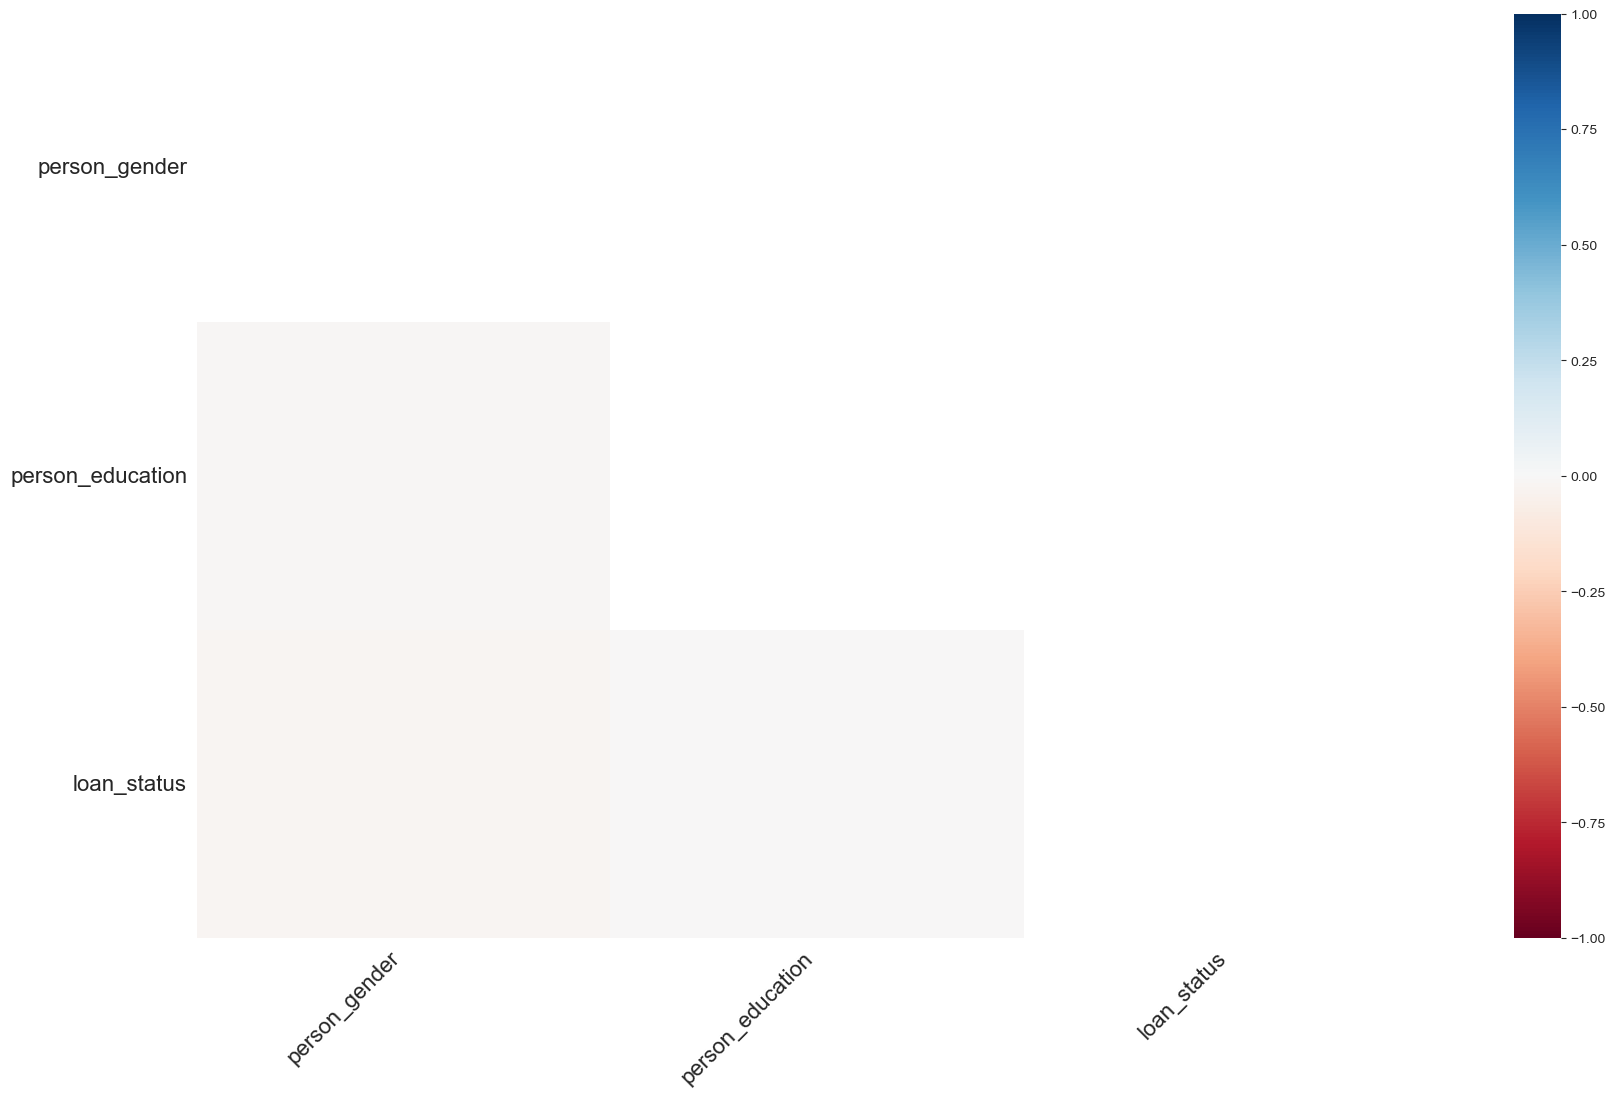

In [109]:
msno.heatmap(df)

<Axes: >

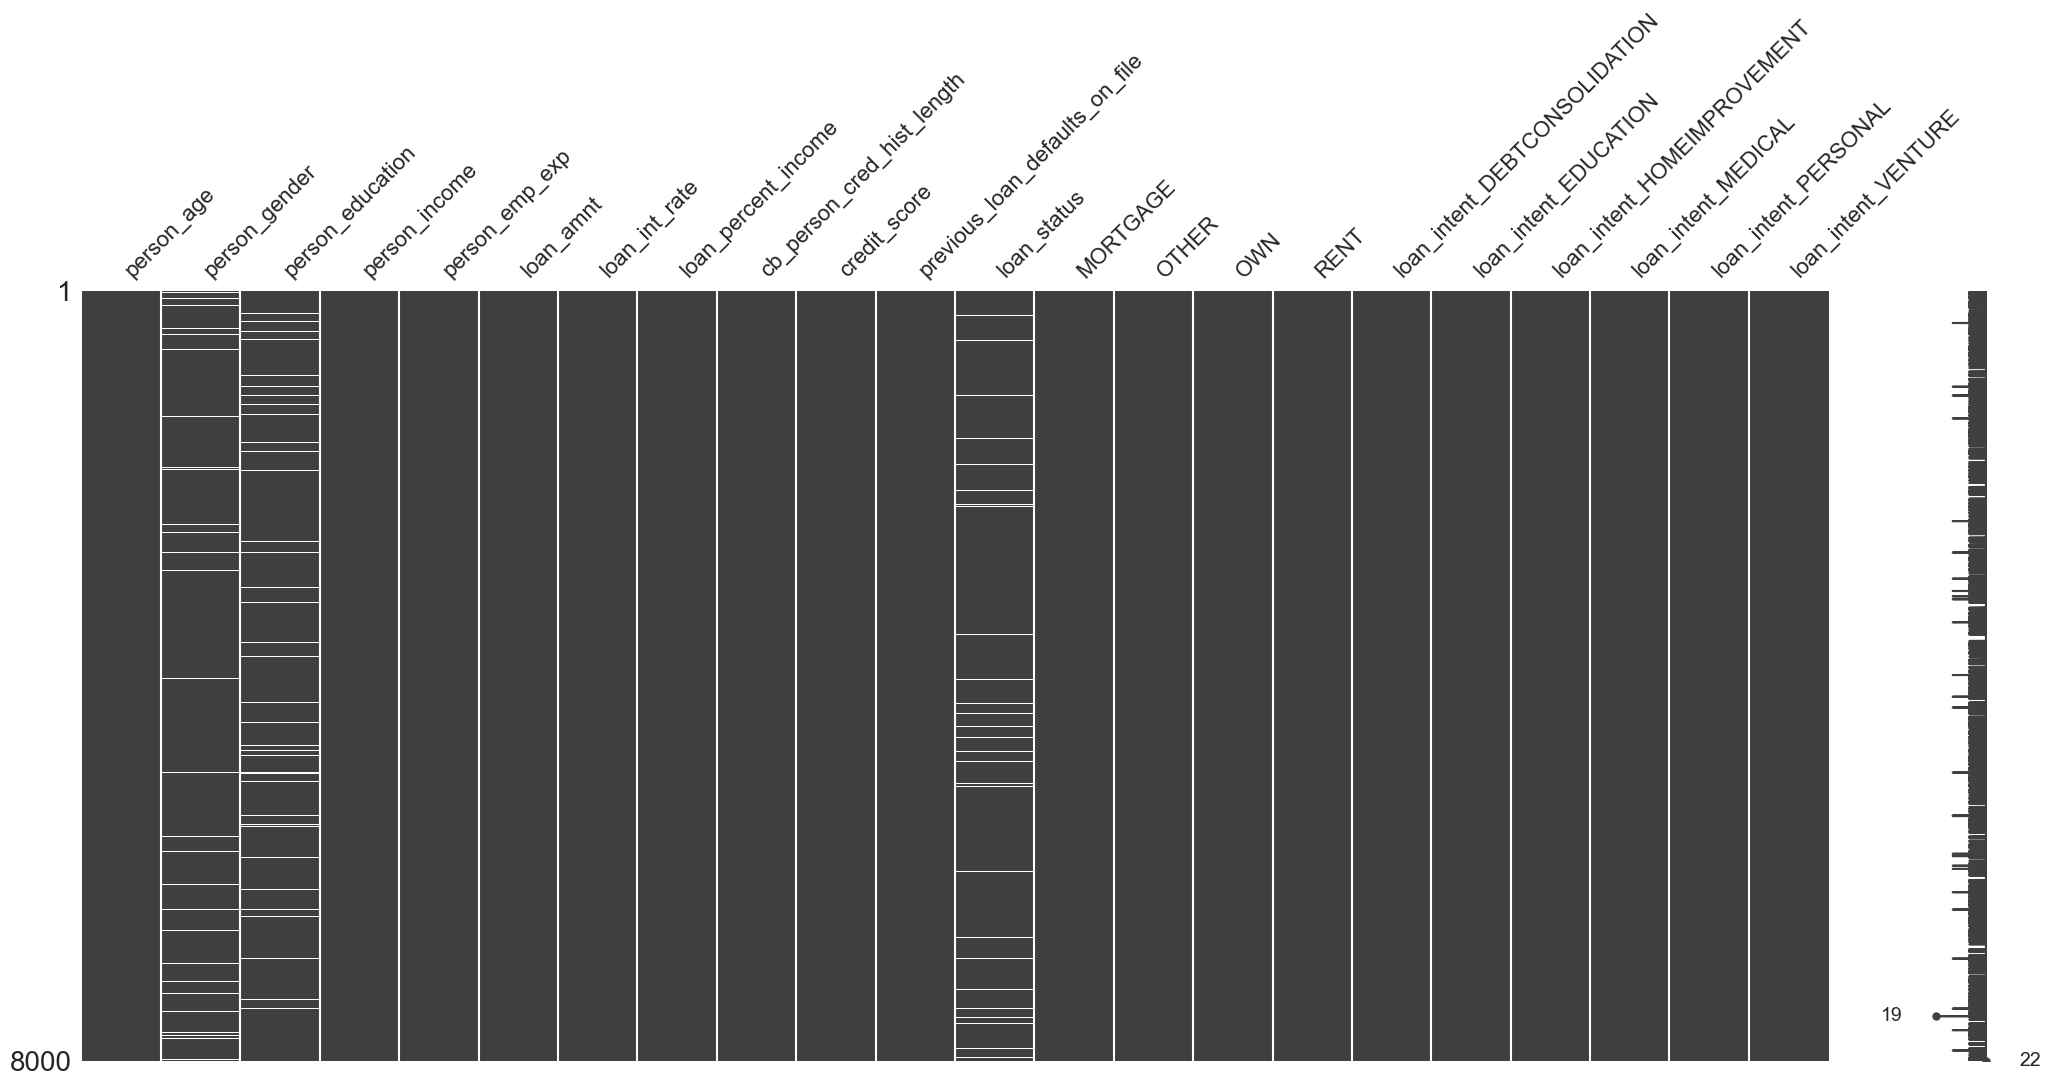

In [110]:
msno.matrix(df)

In [111]:
df.groupby('person_gender')['loan_amnt'].mean()

person_gender
0.0    9203.665012
1.0    9027.107058
Name: loan_amnt, dtype: float64

In [112]:
df["person_gender"] = df["person_gender"].fillna(df["person_gender"].mode()[0])

In [113]:
df.isnull().sum()

person_age                          0
person_gender                       0
person_education                  422
person_income                       0
person_emp_exp                      0
loan_amnt                           0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                        0
previous_loan_defaults_on_file      0
loan_status                       250
MORTGAGE                            0
OTHER                               0
OWN                                 0
RENT                                0
loan_intent_DEBTCONSOLIDATION       0
loan_intent_EDUCATION               0
loan_intent_HOMEIMPROVEMENT         0
loan_intent_MEDICAL                 0
loan_intent_PERSONAL                0
loan_intent_VENTURE                 0
dtype: int64

In [114]:
df.sample(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,MORTGAGE,OTHER,OWN,RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
6477,27.854633,1.0,1.0,75252.0,0,4000.000000,6.76,0.05,4.0,613.000000,...,False,False,True,False,False,True,False,False,False,False
745,27.854633,0.0,0.0,38547.0,4,10000.000000,11.34,0.26,4.0,521.000000,...,False,False,False,True,False,True,False,False,False,False
2533,27.854633,0.0,1.0,71128.0,0,8000.000000,11.61,0.11,4.0,585.000000,...,False,False,False,True,False,False,False,False,True,False
4325,27.854633,0.0,2.0,102001.0,2,5000.000000,16.02,0.05,3.0,704.000000,...,True,False,False,False,True,False,False,False,False,False
669,27.854633,0.0,1.0,44180.0,0,7500.000000,12.59,0.17,3.0,633.000000,...,False,False,False,True,False,False,False,False,True,False
6663,27.854633,1.0,2.0,169072.0,9,12000.000000,8.08,0.07,8.0,565.000000,...,False,False,False,True,True,False,False,False,False,False
3040,27.854633,0.0,0.0,116129.0,0,8000.000000,7.88,0.07,4.0,585.000000,...,True,False,False,False,False,False,False,False,False,True
4453,27.854633,1.0,0.0,133132.0,0,14000.000000,7.88,0.11,2.0,633.000000,...,False,False,False,True,False,False,False,True,False,False
6304,27.854633,0.0,1.0,139848.0,3,27.854633,7.29,0.07,4.0,646.000000,...,True,False,False,False,True,False,False,False,False,False
1638,27.854633,0.0,0.0,45441.0,0,7000.000000,10.59,0.15,2.0,632.527013,...,True,False,False,False,False,False,True,False,False,False


In [115]:
df["loan_status"].unique()

array([ 0.,  1., nan])

<Axes: >

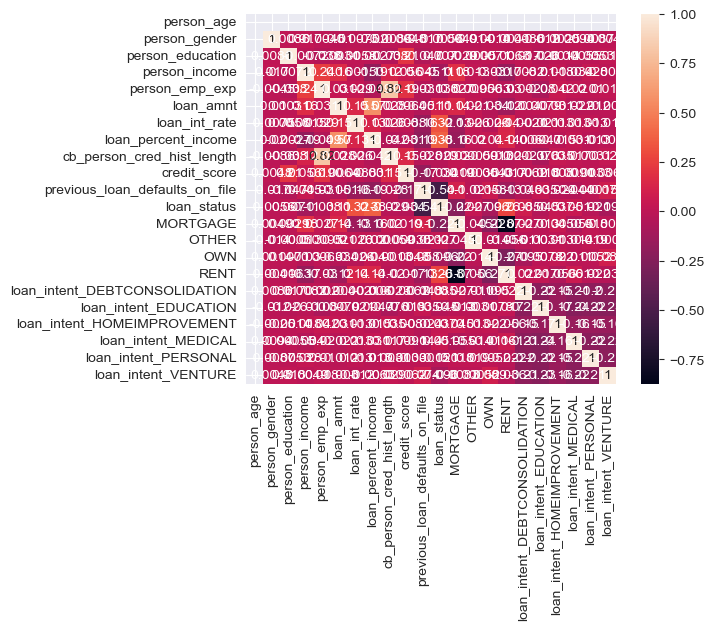

In [116]:
sns.heatmap(df.corr(numeric_only=True), annot=True, square=True)

In [117]:
df.groupby('person_education')['person_income'].median()

person_education
0.0    66965.0
1.0    66962.0
2.0    67263.5
3.0    67220.0
4.0    65224.0
Name: person_income, dtype: float64

In [118]:
df["person_education"] = df["person_education"].fillna(df["person_education"].mode()[0])

In [119]:
df.isnull().sum()

person_age                          0
person_gender                       0
person_education                    0
person_income                       0
person_emp_exp                      0
loan_amnt                           0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                        0
previous_loan_defaults_on_file      0
loan_status                       250
MORTGAGE                            0
OTHER                               0
OWN                                 0
RENT                                0
loan_intent_DEBTCONSOLIDATION       0
loan_intent_EDUCATION               0
loan_intent_HOMEIMPROVEMENT         0
loan_intent_MEDICAL                 0
loan_intent_PERSONAL                0
loan_intent_VENTURE                 0
dtype: int64

In [120]:
df.dropna(subset=["loan_status"], inplace=True)

In [121]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
loan_amnt                         0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
MORTGAGE                          0
OTHER                             0
OWN                               0
RENT                              0
loan_intent_DEBTCONSOLIDATION     0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
dtype: int64

In [122]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,MORTGAGE,OTHER,OWN,RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,27.854633,0.0,1.0,43996.0,4,5000.0,10.37,0.11,4.0,675.0,...,False,False,False,True,False,False,False,False,False,True
1,27.854633,1.0,2.0,115708.0,0,20000.0,7.88,0.17,3.0,635.0,...,True,False,False,False,False,True,False,False,False,False
2,27.854633,1.0,0.0,57827.0,0,6000.0,11.60,0.10,4.0,589.0,...,False,False,False,True,False,False,False,False,True,False
3,27.854633,1.0,3.0,126727.0,9,24000.0,10.27,0.19,7.0,644.0,...,False,False,False,True,True,False,False,False,False,False
4,27.854633,1.0,1.0,120987.0,10,25000.0,12.18,0.21,10.0,644.0,...,False,False,True,False,False,False,False,True,False,False


In [125]:
X, y = df.drop(columns=["loan_status"]), df["loan_status"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [126]:
classifier = LogisticRegression().fit(train_X, train_y)
pred_y = classifier.predict(test_X)
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      1200
         1.0       0.80      0.73      0.76       350

    accuracy                           0.90      1550
   macro avg       0.86      0.84      0.85      1550
weighted avg       0.90      0.90      0.90      1550



In [127]:
classifier = DecisionTreeClassifier().fit(train_X, train_y)

In [128]:
param_grid = {
    "criterion": ["entropy", "gini"],
    "max_depth": [None, 1, 2, 3, 4]
}

In [129]:
grid_search = GridSearchCV(
    classifier,
    param_grid,
    scoring="f1_weighted",
    cv=5
)

In [130]:
grid_search.fit(train_X, train_y)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['entropy', 'gini'], 'max_depth': [None, 1, ...]}"
,scoring,'f1_weighted'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [131]:
pred_y = grid_search.predict(test_X)

In [132]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1200
         1.0       0.88      0.73      0.80       350

    accuracy                           0.92      1550
   macro avg       0.90      0.85      0.87      1550
weighted avg       0.92      0.92      0.91      1550



In [133]:
df.shape

(7750, 22)

In [135]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)
rf.fit(train_X, train_y)

pred = rf.predict(test_X)
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      1200
         1.0       0.92      0.75      0.82       350

    accuracy                           0.93      1550
   macro avg       0.92      0.86      0.89      1550
weighted avg       0.93      0.93      0.92      1550

